# 0 Mise en place des fonctions de travail 

In [1]:
import random

def generate_random_array(debug=False, N=21):
    """Renvoie un tableau contenant toutes les valeurs entières de 0 (inclus)
    à N (exclus) rangées dans un ordre aléatoire

    Args:
        debug (boolean): quand debug est vrai, la fonction renvoie toujours le
                         même tableau afin de simplifier le débogage de vos
                         algorithmes de tri
        N (int): la taille du tableau à renvoyer

    Returns:
        list[int]: un tableau d'entiers, de taille N, non ordonné
    """

    if debug:
        return [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]

    array = list(range(0, N))
    random.shuffle(array)

    return array

In [2]:
# Exemple d'utilisation de la fonction precedente

print(generate_random_array()) # Retourne un tableau avec des nombres naturels allant de 0 a 20
print(generate_random_array(True)) # Retourne le tableau [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
print(generate_random_array(N=31)) # Des nombres naturels allant de 0 a 30

[13, 4, 9, 11, 2, 5, 1, 14, 12, 20, 19, 7, 0, 10, 15, 3, 8, 16, 6, 17, 18]
[3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
[16, 2, 15, 30, 7, 27, 19, 18, 26, 13, 9, 0, 29, 23, 24, 10, 3, 20, 4, 8, 1, 21, 11, 6, 28, 5, 25, 12, 22, 17, 14]


In [3]:
def swap(tab, i, j):
    """Échange la place de deux éléments dans un tableau

    Args:
        tab (list): le tableau dont on veut échanger la place de deux éléments
        i (int): l'indice du premier élement à échanger
        j (int): l'indice du second élément à échanger
    """

    tab[i], tab[j] = tab[j], tab[i]

# 1 Les tris classiques 

## 1.1 Tri à bulles

**Un pseudocode possible** *(source : Wikipedia)*

```
procedure tri_à_bulles(Tableau T)
   pour i allant de (taille de T)-1 à 1
       pour j allant de 0 à i-1
           si T[j+1] < T[j] alors
               échanger(T[j+1], T[j])
       fin pour
   fin pour
        
```

In [4]:
def bubble_sort(tab):
    """Trie le tableau en déplaçant les plus grosses valeurs vers la fin du
    tableau, un peu comme des bulles dans l'eau qui remonteraient à la surface

    Args:
        tab (list): tableau contenant les éléments à trier (entiers,
                    flottants ou chaînes de caractères, le type importe
                    peu, du moment qu'une relation d'ordre existe)
    """

    for i in range(len(tab) - 1, 0, -1):
        for j in range(0, i):
            if tab[j] > tab[j + 1]:
                swap(tab, j, j + 1)

In [5]:
# Génération d'un tableau désordonné
tab = generate_random_array()
print("Avant tri :", tab)

# Tri et affichage du tableau trié
bubble_sort(tab)
print("Après tri :", tab)

Avant tri : [18, 20, 3, 6, 19, 4, 5, 10, 2, 11, 15, 14, 13, 8, 17, 0, 7, 1, 16, 9, 12]
Après tri : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


## 1.2 Insertion

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_insertion(tableau T, entier n)

  pour i de 1 à n - 1
        # mémoriser T[i] dans x
        x ← T[i]                            

        j ← i                               
        tant que j > 0 et T[j - 1] > x
                 T[j] ← T[j - 1]
                 j ← j - 1

        # placer x dans le "trou" laissé par le décalage
        T[j] ← x 
```

In [6]:
def insertion_sort(tab):
    """Trie le tableau en plaçant l'élément courant à la bonne place dans
    le sous-tableau déjà trié

    Args:
        tab (list): tableau contenant les éléments à trier (entiers,
                    flottants ou chaînes de caractères, le type importe
                    peu, du moment qu'une relation d'ordre existe)
    """

    for i in range(1, len(tab)):
        x = tab[i]
        j = i

        while j > 0 and tab[j - 1] > x:
            swap(tab, j - 1, j)
            j -= 1

        tab[j] = x

In [7]:
# Génération d'un tableau désordonné
tab = generate_random_array()
print("Avant tri :", tab)

# Tri et affichage du tableau trié
insertion_sort(tab)
print("Après tri :", tab)

Avant tri : [7, 19, 13, 15, 17, 5, 12, 4, 10, 16, 1, 14, 6, 18, 0, 3, 2, 20, 11, 9, 8]
Après tri : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [8]:
# Utilisation du line profiler
# ============================
# La ligne suivante est à exécuter une unique fois pour l'installtion du profiler.
# !pip3 install line_profiler
# Elle est commentée, parce que ça ne sert à rien de refaire l'installation plusieurs
# fois.
# Il faut ensuite charger l'extension pour pouvoir l'utiliser (à faire une fois dans le notebook) :
%load_ext line_profiler

In [9]:
# On peut à présent utiliser la « magic command » %lprun. Il faut lui spécifier la fonction à surveiller
# après l'option -f. Par exemple, on peut surveiller l'utilisation de la fonction swap, lorsque l'on lance
# notre tri par insertion :
tab = generate_random_array()
%lprun -f swap insertion_sort(tab)

In [10]:
# Mais ce qui nous intéresse plus particulièrement, c'est le nombre de comparaisons faites
# dans la fonction insertion_sort. On peut la surveiller ainsi :
tab = generate_random_array()
%lprun -f insertion_sort insertion_sort(tab)

In [11]:
# %lprun c'est bien, mais récupérer sa sortie n'est pas facilement automatisable. On va plutôt utiliser
# timeit pour ça.

import timeit

N_ITERATIONS=1000

tailles = [10, 50, 100, 500, 750, 1000]
temps_execution = []

for n in tailles:
    tab = generate_random_array(N=n)
    # Documentation de timeit : https://docs.python.org/3/library/timeit.html
    #
    # timeit va exécuter plusieurs fois le `stmt` (premier paramètre de la fonction)
    # dans son propre environnement et va renvoyer le temps pris. Son environnement est 
    # vide par défaut. C'est pourquoi on passe le paramètre `globals` avec le résultat
    # de la fonction `globals()` pour importer l'environnement courant dans l'environnement
    # de timeit. C'est-à-dire, qu'on lui demande d'importer les fonctions et les variables
    # définies dans le notebook.
    # 
    # On ne trie pas directement la liste `tab`, mais une copie de la liste (la copie est faîte
    # grâce à la fonction `list`). Parce que si on trie plusieurs fois d'affilé la même liste,
    # elle est déjà triée, ce qui pour certains algorithmes rend le calcul plus rapide.
    temps_global = timeit.timeit("insertion_sort(list(tab))", globals=globals(), number=N_ITERATIONS)

    # timeit exécute `number` fois le code demandé et renvoie le temps global.
    # On divise donc par ce nombre pour avoir le temps d'une exécution de l'algorithme.
    temps_execution.append(temps_global / N_ITERATIONS)


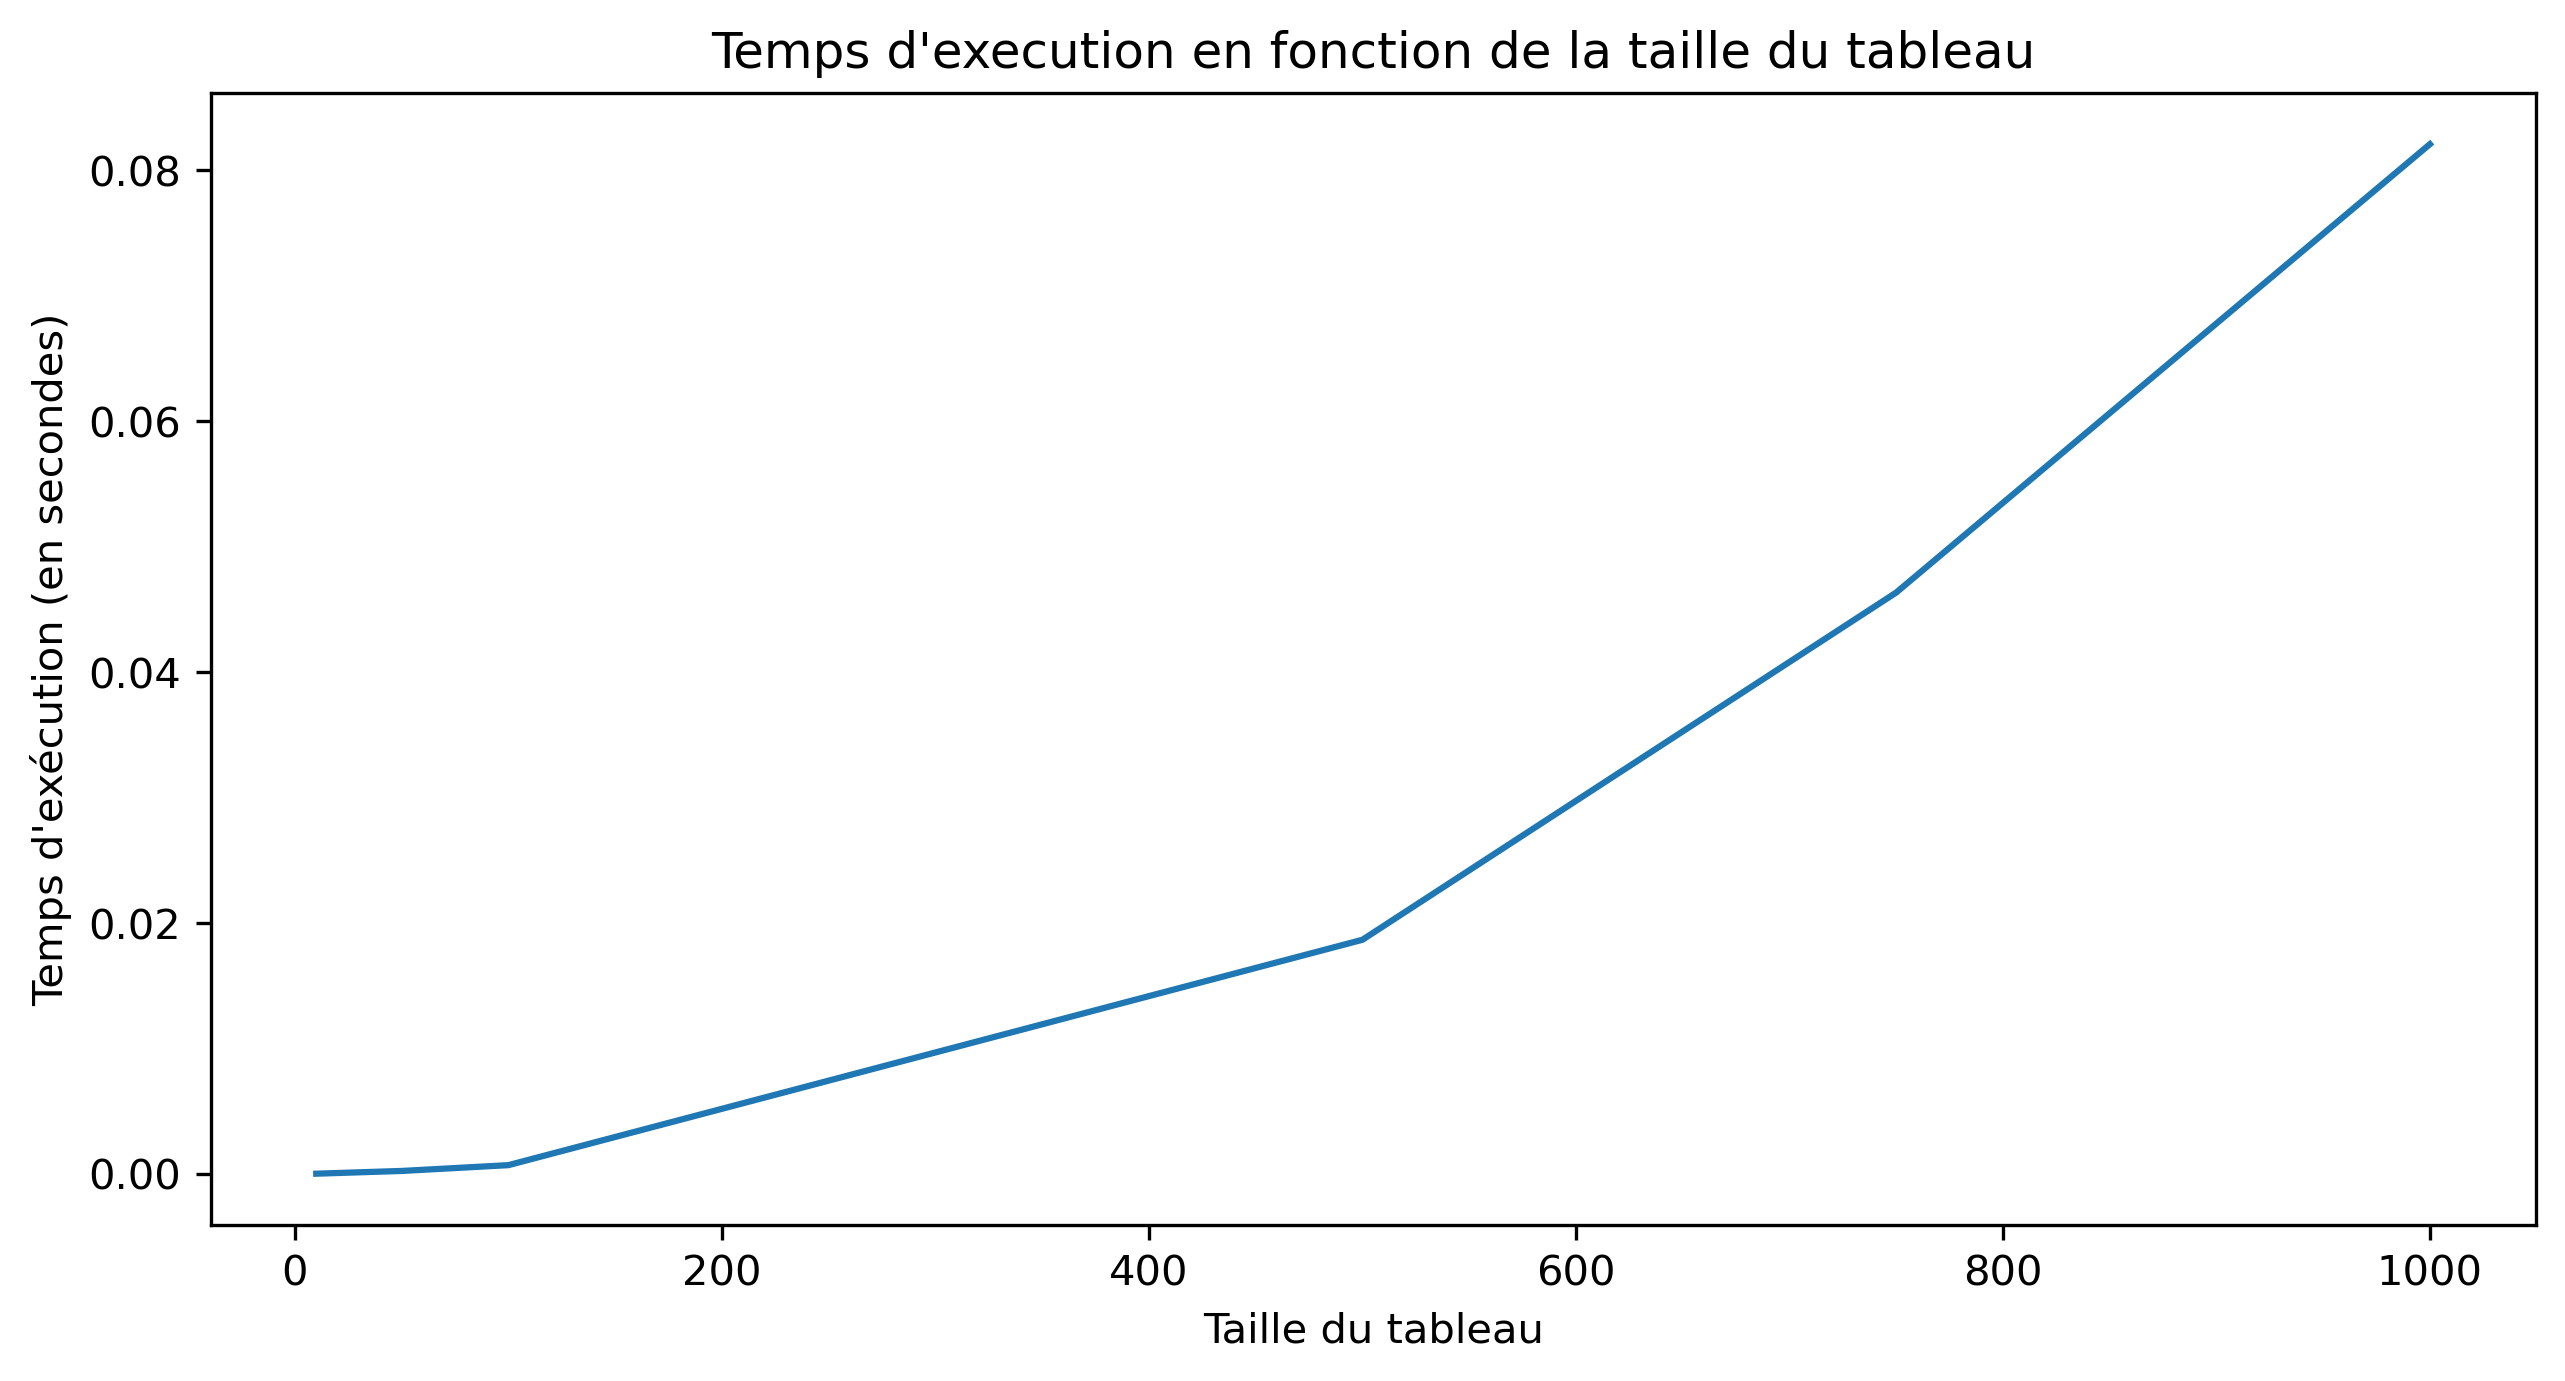

In [12]:
# Visualisation de la courbe
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300.0)
plt.plot(tailles, temps_execution)
plt.title("Temps d'execution en fonction de la taille du tableau")
plt.xlabel("Taille du tableau")
plt.ylabel("Temps d'exécution (en secondes)");

Sur la figure, on voit la forme quadratique de la courbe qui se dessine. Pour en être tout à fait sûr, il faudrait tracer la courbe $n^2$ pour faire la comparaison. On peut aussi tracer d'autres courbes ($n$, $n \log n$, $n^3$, etc) pour être sûr du profil dont on se rapproche le plus. C'est comme ça qu'on évalue, via l'expérience, la complexité d'un algorithme dont on n'arrive pas à calculer la complexité théorique.

## 1.3 Selection

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_selection(tableau t, entier n)
  pour i de 0 à n - 2
      min ← i       
      pour j de i + 1 à n - 1
          si t[j] < t[min], alors min ← j
      fin pour
      si min ≠ i, alors échanger t[i] et t[min]
  fin pour
fin procédure
```

In [13]:
def selection_sort(tab):
    """Trie le tableau en cherchant le plus petit élément à mettre dans la
    première case, puis le second plus petit à mettre dans la seconde case, etc

    Args:
        tab (list): tableau contenant les éléments à trier (entiers,
                    flottants ou chaînes de caractères, le type importe
                    peu, du moment qu'une relation d'ordre existe)
    """

    for i in range(len(tab) - 1):
        indice_du_min = i

        for j in range(i + 1, len(tab)):
            if tab[j] < tab[indice_du_min]:
                indice_du_min = j

        if i != indice_du_min:
            swap(tab, i, indice_du_min)

In [14]:
# Génération d'un tableau désordonné
tab = generate_random_array()
print("Avant tri :", tab)

# Tri et affichage du tableau trié
selection_sort(tab)
print("Après tri :", tab)

Avant tri : [11, 9, 15, 3, 16, 10, 2, 20, 1, 8, 6, 19, 17, 14, 0, 7, 18, 13, 12, 4, 5]
Après tri : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
